# Introduction 

Artificial Neural Networks (ANN) and Convolutional Neural Networks (CNN) are two of the most fundamental architectures in the field of deep learning. In this notebook, we delve into the exploration and implementation of these powerful models using the MNIST dataset.
<br>
<br>
The MNIST dataset is a classic benchmark dataset in the machine learning community, consisting of 28x28 pixel grayscale images of handwritten digits (0-9). It serves as an excellent starting point for beginners to understand and experiment with various neural network architectures due to its simplicity and accessibility.

**Throughout this notebook, we will practice on using ANN and Simple CNN.**




# Import libraries and prepare what we need.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense, Conv2D, MaxPool2D, Flatten
from keras.applications import ResNet50
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [ ]:
keras.utils.set_random_seed(123)

In [ ]:
early_stop=EarlyStopping(monitor='accuracy',patience=10,restore_best_weights=True)

# Load MNIST Dataset

In [15]:
(X_train, y_train), (X_test, y_test) =keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### Rescale Independent Features

In [17]:
# Normalize
X_train =X_train / 255.
X_test  =X_test / 255.

In [18]:
X_train=(X_train.astype('float32'))
X_test=(X_test.astype('float32'))

### OneHotEncode Target Variable

In [19]:
y_train =  keras.utils.to_categorical(y_train)
y_test  =  keras.utils.to_categorical(y_test)

### Preview the Images

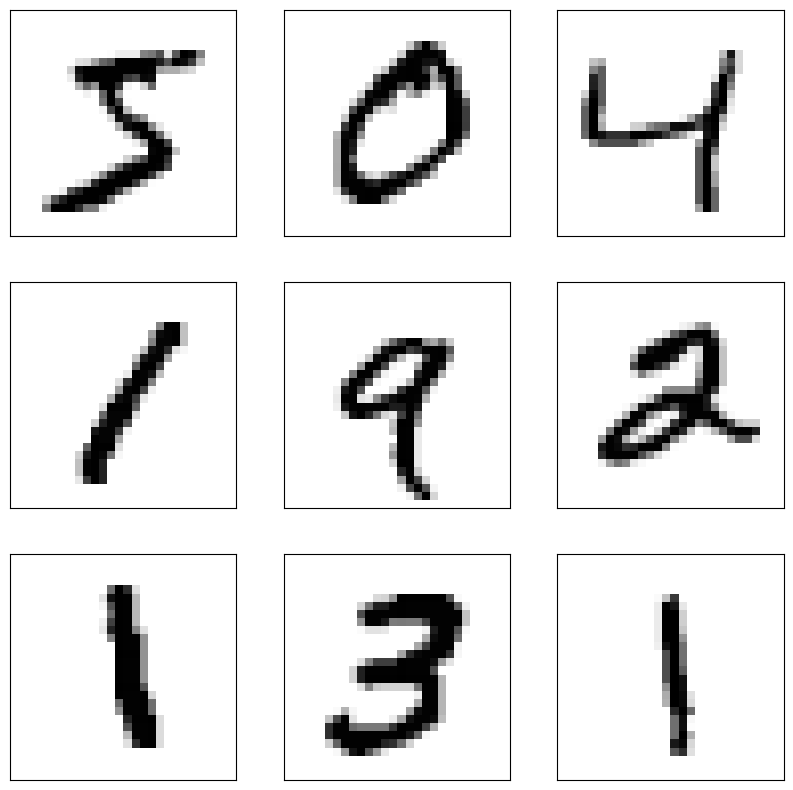

In [20]:
# plot first few images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()


## `+` Set Global Parameters

In [21]:
# Hyperparameters
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS      = 20

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [23]:
ANN_model_1=Sequential()
ANN_model_1.add(Dense(1024,activation=('relu'),input_shape=(28* 28*1,)))
ANN_model_1.add(Dense(512,activation=('relu'))) 
ANN_model_1.add(Dense(256,activation=('relu'))) 
ANN_model_1.add(Dense(128,activation=('relu')))
ANN_model_1.add(Dense(10,activation=('softmax')))
ANN_model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
ANN_model_1.compile(optimizer=keras.optimizers.Adam(0.01),metrics=['accuracy'], loss='categorical_crossentropy')

In [30]:
x_train_flat = X_train.reshape(-1, 28*28*1)
x_test_flat = X_test.reshape(-1, 28*28*1)

In [46]:
his1 =ANN_model_1.fit(x_train_flat, y_train,
          epochs=20,
          batch_size=BATCH_SIZE ,callbacks=[early_stop])

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8557 - loss: 0.5171
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9473 - loss: 0.2188
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9563 - loss: 0.1825
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9620 - loss: 0.1604
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9684 - loss: 0.1322
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9688 - loss: 0.1308
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9667 - loss: 0.1455
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9721 - loss: 0.1235
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9754 - loss: 0.1049
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9752 - loss: 0.1098
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9750 - loss: 0.1129
Epoch 12/20
938/938 ━━━━━━━━━━

#### Model Ealuation

In [48]:
loss, accuracy = ANN_model_1.evaluate(x_test_flat, y_test)
print("-----------------on test data--------------")
print("Loss: " , loss)
print("Accuracy: " ,accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9646 - loss: 0.2504
-----------------on test data--------------
Loss:  0.19303596019744873
Accuracy:  0.97079998254776


#### Result Visualization

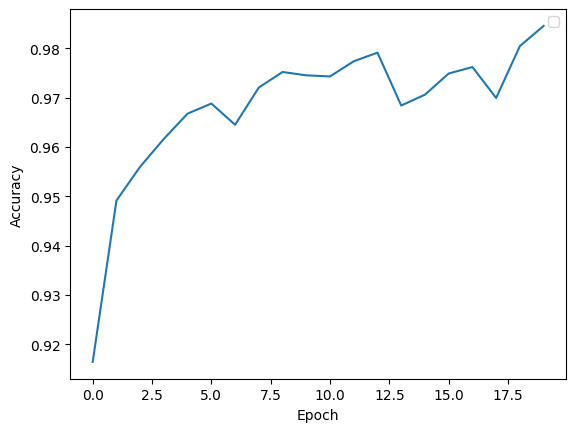

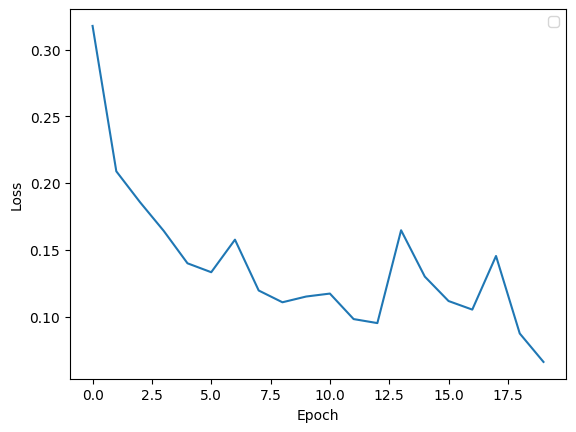

In [49]:
# Plot the training accuracy and loss
plt.plot(his1.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(his1.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Trial no. 2

#### Model Training

In [27]:
ANN_model_2=Sequential()
ANN_model_2.add(Dense(512,activation=('relu'),input_shape=(28* 28*1,)))
ANN_model_2.add(Dense(128,activation=('relu')))
ANN_model_2.add(Dense(10,activation=('softmax')))
ANN_model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
ANN_model_2.compile(optimizer=keras.optimizers.Adam(0.01),metrics=['accuracy'], loss='categorical_crossentropy')

In [31]:
his2 =ANN_model_2.fit(x_train_flat, y_train,
          epochs=20,
          batch_size=BATCH_SIZE,
                     callbacks=[early_stop])

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8808 - loss: 0.4013
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9563 - loss: 0.1535
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9657 - loss: 0.1267
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9690 - loss: 0.1125
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9682 - loss: 0.1204
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9756 - loss: 0.0877
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9765 - loss: 0.0888
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9768 - loss: 0.0859
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9780 - loss: 0.0864
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9776 - loss: 0.0867
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9816 - loss: 0.0735
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/

#### Model Evaluation

In [32]:
loss, accuracy = ANN_model_2.evaluate(x_test_flat, y_test)
print("-----------------on test data--------------")
print("Loss: " , loss)
print("Accuracy: " ,accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9691 - loss: 0.2833
-----------------on test data--------------
Loss:  0.22313927114009857
Accuracy:  0.9742000102996826


#### Result Visualization

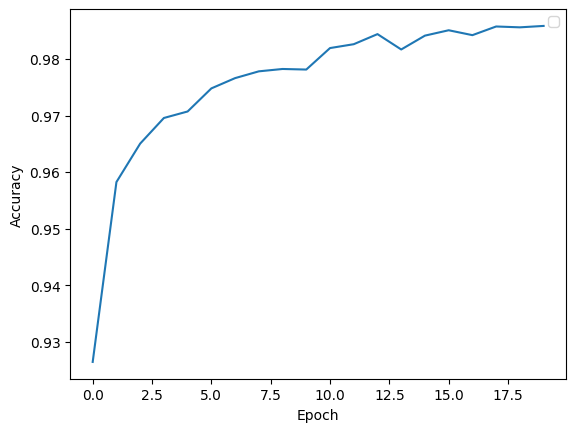

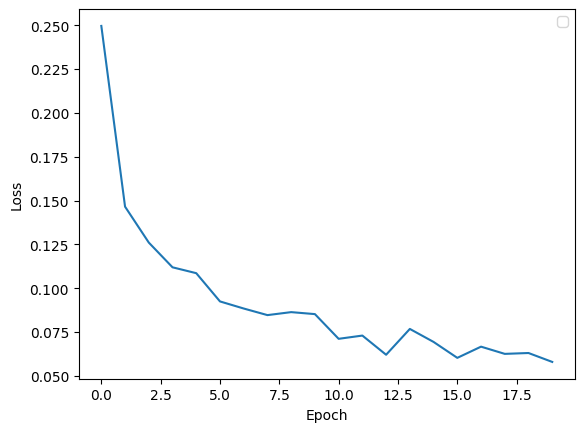

In [33]:
# Plot the training accuracy and loss

plt.plot(his2.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(his2.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [46]:
X_train =X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test =X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

In [47]:
cnn_model_1=Sequential()
cnn_model_1.add(Conv2D(15,(3,3),activation='relu',input_shape=(28,28,1)))
cnn_model_1.add(MaxPool2D())
cnn_model_1.add(Conv2D(20,(3,3),padding="same",activation='relu'))
cnn_model_1.add(MaxPool2D())
cnn_model_1.add(Conv2D(10,(3,3),padding="same",activation='relu'))
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(256, activation='relu'))
cnn_model_1.add(Dense(10, activation='softmax'))
cnn_model_1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 15)     │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 20)     │         2,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 10)       │         1,810 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 360)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │        92,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,666 (389.32 KB)

 Trainable params: 99,666 (389.32 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
cnn_model_1.compile(optimizer=keras.optimizers.Adam(0.01),metrics=['accuracy'], loss='categorical_crossentropy')

In [50]:
his3 =cnn_model_1.fit(X_train, y_train,
          epochs=20,
          batch_size=BATCH_SIZE,
         callbacks=[early_stop])

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9686 - loss: 0.1081
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9771 - loss: 0.0767
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9795 - loss: 0.0715
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9803 - loss: 0.0679
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9823 - loss: 0.0651
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9825 - loss: 0.0673
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9838 - loss: 0.0616
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9826 - loss: 0.0674
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9828 - loss: 0.0718
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9841 - loss: 0.0658


#### Model Evaluation

In [52]:
loss, accuracy = cnn_model_1.evaluate(X_test, y_test)
print("-----------------on test data--------------")
print("Loss: " , loss)
print("Accuracy: " ,accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9723 - loss: 0.0940
-----------------on test data--------------
Loss:  0.07520364969968796
Accuracy:  0.977400004863739


#### Result Visualization

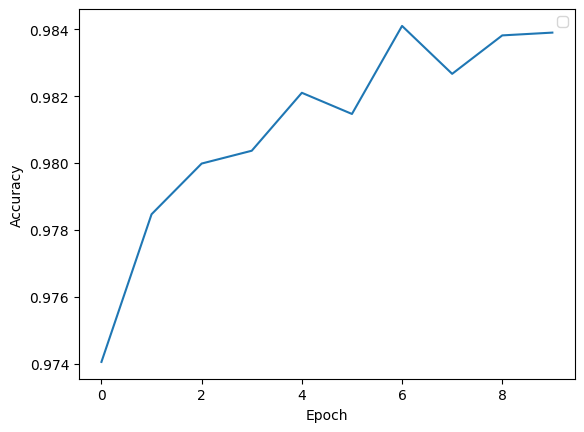

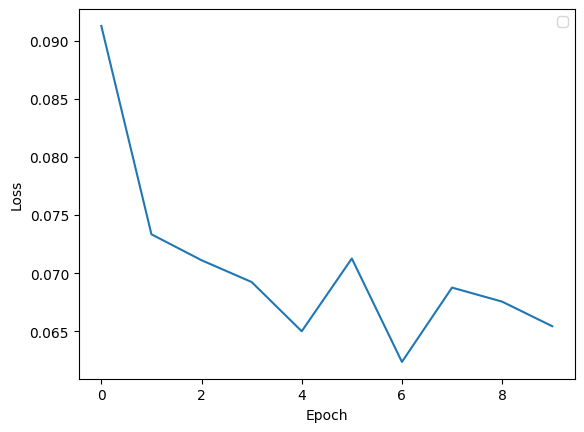

In [53]:
# Plot the training accuracy and loss

plt.plot(his3.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(his3.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Trial no. 2

#### Model Training

In [ ]:
cnn_model_1=Sequential()
cnn_model_1.add(Conv2D(15,(3,3),activation='relu',input_shape=(28,28,1)))
cnn_model_1.add(MaxPool2D())
cnn_model_1.add(Conv2D(20,(3,3),padding="same",activation='relu'))
cnn_model_1.add(MaxPool2D())
cnn_model_1.add(Conv2D(10,(3,3),padding="same",activation='relu'))
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(256, activation='relu'))
cnn_model_1.add(Dense(10, activation='softmax'))
cnn_model_1.summary()

In [55]:
cnn_model_2=Sequential()
cnn_model_2.add(Conv2D(15,(3,3),padding="same",activation='relu',input_shape=(28,28,1)))
cnn_model_2.add(MaxPool2D())
cnn_model_2.add(Conv2D(10,(3,3),activation='relu'))
cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(256, activation='relu'))
cnn_model_2.add(Dense(10, activation='softmax'))
cnn_model_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 15)     │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 10)     │         1,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1440)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       368,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 372,976 (1.42 MB)

 Trainable params: 372,976 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
cnn_model_2.compile(optimizer=keras.optimizers.Adam(0.01),metrics=['accuracy'], loss='categorical_crossentropy')

In [57]:
his4 =cnn_model_2.fit(X_train, y_train,
          epochs=20,
          batch_size=BATCH_SIZE,
         callbacks=[early_stop])

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9266 - loss: 0.2424
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9769 - loss: 0.0756
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9831 - loss: 0.0578
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9861 - loss: 0.0497
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9876 - loss: 0.0472
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9861 - loss: 0.0610
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9916 - loss: 0.0361
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9897 - loss: 0.0503
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9923 - loss: 0.0380
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9909 - loss: 0.0452
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9908 - loss: 0.0480
Epoch 12/20
938/938 ━━━━━━━━━━

#### Model Evaluation

In [59]:
loss, accuracy = cnn_model_2.evaluate(X_test, y_test)
print("-----------------on test data--------------")
print("Loss: " , loss)
print("Accuracy: " ,accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9778 - loss: 0.3498
-----------------on test data--------------
Loss:  0.28269922733306885
Accuracy:  0.9819999933242798


#### Result Visualization

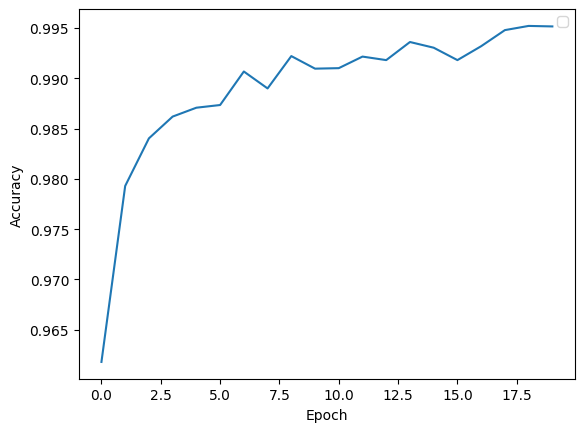

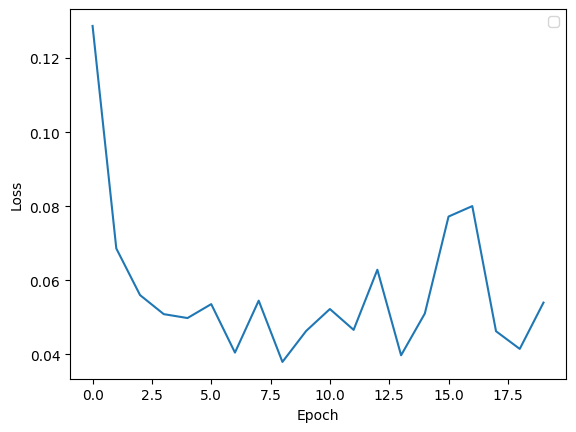

In [60]:
# Plot the training accuracy and loss

plt.plot(his4.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(his4.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Nada \space Alswah $$